In [90]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [91]:
train = ImageDataGenerator(rescale=1.0/255.0,
                           horizontal_flip=True, 
                           shear_range=0.2, 
                           zoom_range=0.2,
                           width_shift_range=0.2,
                           height_shift_range=0.2, 
                           fill_mode='nearest', 
                           validation_split=0.3)
img_size = 128
batch_size = 25
train_steps = 3462/batch_size
validation_steps = 861/batch_size
traindata = train.flow_from_directory('weather', 
                                      target_size = (img_size, img_size), 
                                      batch_size = batch_size,
                                      color_mode="rgb",
                                      class_mode='categorical', 
                                      shuffle=True,
                                      subset='training')
validationdata = train.flow_from_directory('weather', 
                                           target_size = (img_size, img_size), 
                                           batch_size = batch_size, 
                                           class_mode='categorical', 
                                           color_mode="rgb",
                                           shuffle=True,
                                           subset='validation')

Found 742 images belonging to 4 classes.
Found 316 images belonging to 4 classes.


In [92]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)            

In [93]:
showmodel = model.fit_generator(traindata, 
                steps_per_epoch=train_steps, 
                epochs=25, validation_data=validationdata, 
                validation_steps=validation_steps)

Epoch 1/25
139/138 [==============================] - 133s 953ms/step - loss: 0.6148 - accuracy: 0.7636 - val_loss: 0.3878 - val_accuracy: 0.7573
Epoch 2/25
139/138 [==============================] - 131s 939ms/step - loss: 0.3854 - accuracy: 0.8536 - val_loss: 0.3116 - val_accuracy: 0.8125
Epoch 3/25
139/138 [==============================] - 125s 901ms/step - loss: 0.2685 - accuracy: 0.9028 - val_loss: 0.4731 - val_accuracy: 0.8715
Epoch 4/25
139/138 [==============================] - 120s 863ms/step - loss: 0.2197 - accuracy: 0.9155 - val_loss: 0.4668 - val_accuracy: 0.8191
Epoch 5/25
139/138 [==============================] - 119s 858ms/step - loss: 0.2310 - accuracy: 0.9170 - val_loss: 0.3637 - val_accuracy: 0.8573
Epoch 6/25
139/138 [==============================] - 119s 856ms/step - loss: 0.1721 - accuracy: 0.9342 - val_loss: 0.2552 - val_accuracy: 0.8550
Epoch 7/25
139/138 [==============================] - 119s 859ms/step - loss: 0.1331 - accuracy: 0.9509 - val_loss: 0.4840 -

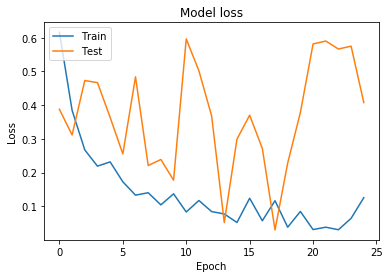

In [94]:
plt.plot(showmodel.history['loss'])
plt.plot(showmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

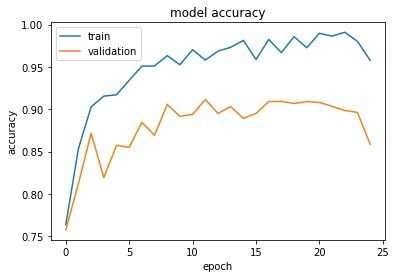

In [95]:
plt.plot(showmodel.history['accuracy'])
plt.plot(showmodel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [96]:
testdata = train.flow_from_directory('test', 
                                      target_size = (img_size, img_size), 
                                      batch_size = 1,
                                      color_mode="rgb",
                                      class_mode=None, 
                                      shuffle=False)

Found 8 images belonging to 1 classes.


In [97]:
model.evaluate_generator(generator=validationdata,
steps=validation_steps)

[0.5056757926940918, 0.8518086075782776]

In [98]:
model.save('weather.h5')

In [99]:
from keras.models import load_model

loaded_model = load_model('weather.h5')

In [100]:
loaded_model.layers[0].input_shape 

(None, 128, 128, 3)

In [101]:
import os
from keras.preprocessing import image

IMG_SIZE = 128

batch_holder = np.zeros((20, IMG_SIZE, IMG_SIZE, 3))
img_dir='test/test'
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(IMG_SIZE,IMG_SIZE))
  batch_holder[i, :] = img

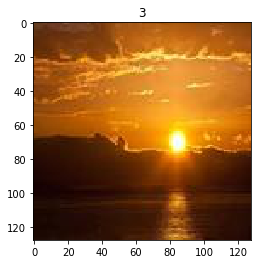

In [102]:
image_path="test/test/sunrise76.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
re_class = np.argmax(result[0])
plt.title(re_class)
plt.show()

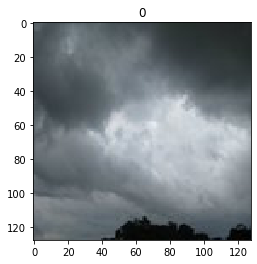

In [109]:
image_path="test/test/cloudy33.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
re_class = np.argmax(result[0])
plt.title(re_class)
plt.show()

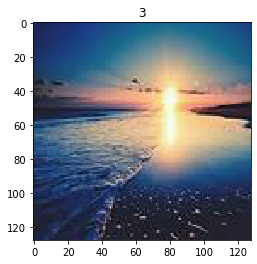

In [104]:
image_path="test/test/sunrise58.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
re_class = np.argmax(result[0])
plt.title(re_class)
plt.show()

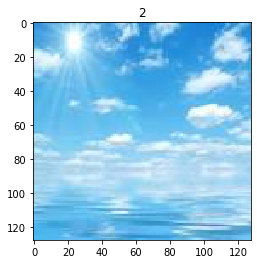

In [111]:
image_path="test/test/shine44.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
re_class = np.argmax(result[0])
plt.title(re_class)
plt.show()

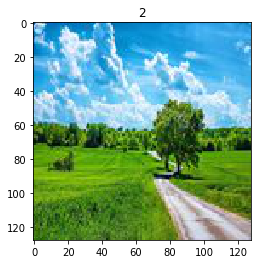

In [112]:
image_path="test/test/shine55.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
re_class = np.argmax(result[0])
plt.title(re_class)
plt.show()